## 리뷰 데이터 불러오기

In [1]:
import pandas as pd
import os

review_path = './data/makeup_review/'
review_files = os.listdir(review_path)

len(review_files)

977

In [3]:
df_rvw_tmp = [pd.read_excel(review_path+file) for file in review_files if "_review.xlsx" in file]
df_rvw = pd.concat(df_rvw_tmp)
df_rvw.reset_index(drop=True, inplace=True)
df_rvw.head(3)

,score,review,date,url,price
0,평점5,커버력이 좋아요^^,21.09.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
1,평점5,"쿠션 하나 샀을 뿐인데 사은품이 한가득이네요. 스킨로션에 크림이랑 클렌징 오일, 클...",21.07.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
2,평점5,여윽시 헤라 불랙쿠션 진짜 이거 쓰면 다른거 절대 못써용,21.08.31.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"


In [2]:
df_rvw = pd.read_excel(review_path + 'makeup_review.xlsx')

In [3]:
df_rvw.head(3)

,review_date,review_score,reviews,name,url,price
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
2,없음,없음,없음,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"


In [4]:
df_rvw = df_rvw[df_rvw['reviews']!='없음']
df_rvw.head(3)

,review_date,review_score,reviews,name,url,price
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
3,21.12.24.,평점5,촉촉하고 가벼워서 좋아요,3_번제품,https://cr.shopping.naver.com/adcr.nhn?x=wgbBY...,"59,500"


In [10]:
date = 'YY.MM.DD'
print('월 정보 :', date[3:5])

월 정보 : MM


Text(0, 0.5, '리뷰수')

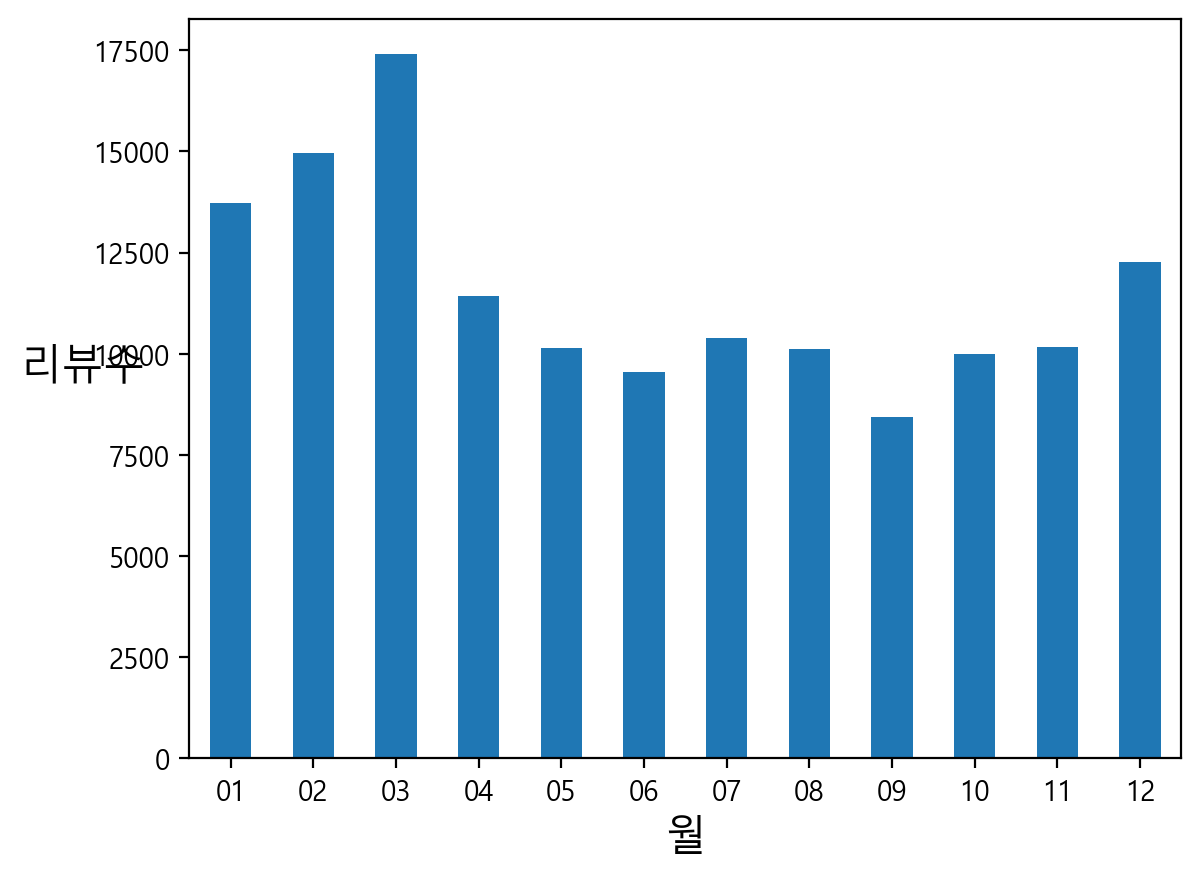

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

df_rvw['month'] = df_rvw['review_date'].apply(lambda x:x[3:5])
df_rvw['month'].value_counts().sort_index().plot.bar()

plt.xticks(rotation=0)
plt.xlabel('월', size=15)
plt.ylabel('리뷰수', size=15, rotation=0)

## 형태소 분석을 이용하여 리뷰에서 의도 찾기

In [24]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

def find_nouns_verb_adject(text):
    """입력된 문장에서 명사, 동사 추출해 리스트로 반환"""
    tokens = kiwi.tokenize(text)

    target_idxs=[]
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag:
            if len(wrd.form) > 1:
                target_words.append(wrd.form)

                target_idxs.append('noun')
        elif wrd.tag.startswith("V"):
            tmp_form = wrd.form + "다"
            target_words.append(tmp_form)
            target_idxs.append('verb')
    return target_words, target_idxs

def find_intension_one_text(words, words_tag):
    """문장 내 의도를 나타내는 단어를 추출한다"""
    intensions = []
    for idx, tag in enumerate(words_tag):
        try:
            if tag == 'verb':
                word = "".join(words[idx-1:idx+1])
                intensions.append(word)
            elif (tag=='noun') and (words_tag[idx+1]!='verb'):
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])
    return intensions

def find_intension(text):
    """입력된 문장에서 의도를 찾아서 반환한다"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs)
    return " ".join(intensions)

sample_sent = '이번에 출시한 신제품은 촉촉하고 가벼워서 좋아요'
find_intension(sample_sent)

'이번 출시 제품가볍다 가볍다좋다'

In [7]:
df_rvw['리뷰_의도'] = df_rvw['reviews'].apply(lambda x:find_intension(x))
df_rvw.to_csv(review_path+'makeup_review_fin.csv', index = False)
df_rvw_1 = df_rvw.copy()
df_rvw_1.head(2)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",01,배송 사은품 감사
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",06,블랙 쿠션 리뉴얼


In [11]:
df_rvw_1 = pd.read_csv('./data/makeup_review/makeup_review_fin.csv')
df_rvw_1.head(2)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",1,배송 사은품 감사
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",6,블랙 쿠션좋다 리뉴얼좋다


### nGram으로 키워드 파악

In [13]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams = []
    for i in range(0, int(len(tokens))):
        tmp = tokens[i:i+n]
        if len(tmp) > 1:
            bigrams.append(tmp)

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result
tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()

bigram_rvw = getGram(tokens=tokens, n=2)

display(bigram_rvw[:20])
display(bigram_rvw[20:40])
display(bigram_rvw[40:60])

TypeError: sequence item 809: expected str instance, float found

In [14]:
def print_center_words(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

    rvws = [rvw for rvw in review_stpwrds if center_word in rvw]

    #앞뒤 n개 단어를 가져온다
    for rvw in rvws:
        rvw_split = rvw.split()
        for idx, token in enumerate(rvw_split):
            if center_word in token:
                front_part = " ".join(rvw_split[idx-n:idx])
                end_part = " ".join(rvw_split[idx+1:idx+n+1])
                joined_parts = front_part + " " + center_word + " " + end_part
                len_joined_parts = joined_parts.split()
                if len(len_joined_parts) == (n*2+1):
                    print("{0}'\x1b[1;31m{1}\x1b[0m'{2}".format(front_part, center_word, end_part))

print_center_words(center_word='좋다', dataframe=df_rvw_1, column_name='리뷰_의도', n=2)


블랙 쿠션'좋다'좋다지다 지다하다
쿠션 리뉴좋다'좋다'지다하다 구매보다
촉촉하다발리다 보송'좋다'여름쓰다 쓰다좋다
마무리좋다 여름쓰다'좋다'쿠션같다 마스크묻다
쿠션같다 마스크묻다'좋다'커버좋다 컨실러하다
마스크묻다 지속좋다'좋다'컨실러하다 하다연하다
고민이다 미니파데오다'좋다'퍼프오다 완죤
작년쓰다 쓰다보다'좋다'리필 구매저렴하다
구매 샘플'좋다'좋다쓰다 구매
상품이다 포장'좋다'화장품 유효
그동안쓰다 쓰다보다'좋다'좋다같다 헤라짱
모습 칭찬주다'좋다'샘플 종류오다
리뉴얼되이다 이다좋다'좋다'지다느끼다 느끼다지다
건조지다 지다않다'좋다'커버 자연
커버 자연'좋다'감탄하다 제품이다
차례 라이브통하다'좋다'사은품 혜택
하루 종일'좋다'쿠션이다 케이스이쁘다
쿠션이다 피부붙다'좋다'요즘 마스크쓰다
얼굴하얗다 하얗다하다'좋다'좋다하다 피부
하얗다하다 하다좋다'좋다'피부 차이나다
않다얇다 얇다고르다'좋다'지속좋다 좋다예쁘다
얇다고르다 밀착좋다'좋다'좋다예쁘다 예쁘다무너지다
밀착좋다 지속좋다'좋다'예쁘다무너지다 감동
케이스이쁘다 이쁘다은은하다'좋다'좋다하얗다 하얗다지다
이쁘다은은하다 은은하다좋다'좋다'하얗다지다 지다보다
지다보다 보다사다'좋다'커버약하다 질감
보다사다 사다이다'좋다'배송빠르다 샘플보내다
설정푸다 푸다예쁘다'좋다'마스크 때문
검색 네오'좋다'얘기듣다 듣다사다
시간지나다 지나다않다'좋다'여름 사용있다
고민놀다 놀다않다'좋다'상품 혜택
쿠션이다 이번'좋다'고민하다 하다지르다
잡티가려지다 마스크벗겨지다'좋다'건성이다 여름쓰다
건성이다 여름쓰다'좋다'좋다같다 같다쓰다
여름쓰다 쓰다좋다'좋다'같다쓰다 쓰다있다
않다얇다 얇다발리다'좋다'공감 베이스두텁다
강하다않다 않다되다'좋다'좋다같다 색상
않다되다 사용좋다'좋다'색상 다양좋다
많다번들거리다 번들거리다않다'좋다'기본 샘플적다
사용 쿠션대하다'좋다'생각 파데
화장 제격이다'좋다'파우치주다 주다귀엽다
달다다니다 수정'좋다'좋다같다 유분하다
수정 화장좋다'좋다'유분하다 수정
매트묻어나다 여름쓰다'좋다'좋다싶다 기대이다
여름

In [15]:
from collections import Counter

rvw_tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()

common_words = Counter(rvw_tokens).most_common()

common_words_dict = {common_words[i][0]:common_words[i][1] for i in range(len(common_words))}

common_words_dict

{'구매': 13379,
 '만족': 12759,
 '쓰다보다': 12535,
 '쿠션': 12080,
 '피부': 9643,
 '커버': 8955,
 '배송빠르다': 8043,
 '사용': 7211,
 '쓰다있다': 7051,
 '커버좋다': 7021,
 '제품이다': 5900,
 '커버되다': 5056,
 '좋다같다': 5050,
 '제품': 4782,
 '감사': 4555,
 '밀착좋다': 4217,
 '자연': 3840,
 '쓰다이다': 3747,
 '마스크묻다': 3619,
 '좋다좋다': 3603,
 '쿠션이다': 3563,
 '이다좋다': 3423,
 '쓰다좋다': 3332,
 '사용이다': 3319,
 '피부이다': 2995,
 '좋다쓰다': 2985,
 '밀착': 2981,
 '사용보다': 2961,
 '쿠션쓰다': 2898,
 '리필': 2738,
 '주문': 2736,
 '좋다하다': 2700,
 '마음들다': 2695,
 '매트': 2610,
 '마스크묻어나다': 2607,
 '않다좋다': 2605,
 '퍼프': 2605,
 '배송': 2573,
 '생각': 2571,
 '보다좋다': 2548,
 '지속좋다': 2542,
 '가격': 2496,
 '사용있다': 2441,
 '느낌이다': 2385,
 '건조': 2378,
 '있다좋다': 2270,
 '케이스': 2250,
 '이다쓰다': 2152,
 '추천': 2139,
 '사다보다': 2095,
 '수정': 2059,
 '건성이다': 2045,
 '지속': 2030,
 '피부좋다': 2024,
 '빠르다좋다': 1968,
 '마스크쓰다': 1952,
 '구입': 1940,
 '마스크': 1908,
 '색상': 1903,
 '블랙': 1886,
 '구매이다': 1882,
 '시간지나다': 1836,
 '화장': 1824,
 '이다하다': 1760,
 '되다좋다': 1706,
 '피부맞다': 1697,
 '팩트': 1683,
 '얼굴': 1635,
 '묻다나다': 1627,
 '되다같다': 

In [22]:
def print_center_words_2(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

    rvws = [rvw for rvw in review_stpwrds if center_word in rvw]
    #앞뒤 n개 단어를 가져온다
    review_results = []
    for rvw in rvws:
        rvw_split = rvw.split()
        for idx, token in enumerate(rvw_split):
            if center_word in token:
                front_part = " ".join(rvw_split[idx-n:idx])
                end_part = " ".join(rvw_split[idx+1:idx+n+1])
                joined_parts = front_part + " " + center_word + " " + end_part
                len_joined_parts = joined_parts.split()
                if len(len_joined_parts) == (n*2+1):
                    review_results.append(joined_parts)
    #어절 빈도를 계산한다.
    all_words_counts = []
    for result in review_results:
        count = 0
        for t in result.split():
            cnt = common_words_dict[t]
            count += cnt
        all_words_counts.append(count)
    df_count = pd.DataFrame(data={"특정단어_포함한_리뷰":review_results, "빈도":all_words_counts}).sort_values(by="빈도", ascending=False)
    return df_count

In [23]:
df_count = print_center_words_2(center_word="좋다", dataframe=df_rvw_1, column_name='리뷰_의도', n=4)
df_count[:10]

,특정단어_포함한_리뷰,빈도
1694,만족 라이브 방송통하다 구매 좋다 가격저렴하다 만족 사용 구매,61762
10649,이다같다 평소 쿠션 피부 좋다 좋다하다 제품 쿠션 만족,57857
10650,평소 쿠션 피부 표현좋다 좋다 제품 쿠션 만족 쿠션이다,57640
13391,컨실러쓰다 정도 만족 커버되다 좋다 피부 표현되다 구매 만족,57158
13410,피부 피부이다 이다쓰다 쓰다보다 좋다 구매 사은품챙기다 챙기다주다 만족,56495
762,감사쓰다 쿠션 피부 자연올라가다 좋다 좋다같다 구매 구매 건강,55461
3041,쿠션 관심많다 사람이다 이다좋다 좋다 쓰다보다 만족 제품없다 쿠션,54798
20605,쓰다보다 지속좋다 구매 배송빠르다 좋다 퍼프 추가 구매 구매싶다,54697
4949,쿠션 사용 뮤드 쿠션 좋다 밀착되다 아침 쿠션 사용,53802
9302,좋다같다 사용 프라이머 사용 좋다 좋다같다 만족 구매 의사있다,53137


### 머신 러닝을 활용하여 중요한 내용 찾기

In [9]:
import re

def get_digit_only(text):
    """숫자만 추출한다"""
    if text != '없음':
        tmp = re.compile('[0-9]+').findall(str(text))
        result = ''.join(tmp)

        return int(result)
    else:
        return 0
def labeling_review(score):
    """3이상이면 1 반환"""
    if score > 3:
        return 1
    else:
        return 0
    
df_rvw_1['review_score'] = df_rvw_1['review_score'].apply(lambda x:get_digit_only(x))
df_rvw_1['label'] = df_rvw_1['review_score'].apply(lambda x:labeling_review(x))

df_rvw_1.sample(2)


,review_date,review_score,reviews,name,url,price,month,리뷰_의도,label
69705,22.04.04.,5,되게 깨끗하게 발려요.. 지속력은 모르겠지만\n다크닝도 없고 진짜 좋음 ㅎㅎ !\n...,612_번제품,https://cr.shopping.naver.com/adcr.nhn?x=NqbDD...,"19,200",04,지속 다크닝 추천,1
35485,21.05.23.,4,피부가 유분이 많아 어떤 걸 써도 지속이 오래 되진 않아요. 이 제품도 하루 종일 ...,299_번제품,https://cr.shopping.naver.com/adcr.nhn?x=eOv99...,"23,800",05,피부 지속 제품 하루 종일 경우 정도 수정 유지 자연 밀착 커버,1


In [ ]:
#사용감
use_function = ['커버', '밀착' ,'얇', '사용', '부드', '부들', '매끈', '광채', '간편']

#성분
ingre_function = ['위해', '주의', '성분', '순한', '자극']

#가격
price_function = ['가성', '가격', '할인', '세일']

#마스크
mask_function = ['마스크', '코로니']

#시원함
cool_function = ['여름', '시원', '상큼']

#수분
water_function = ['촉촉', '수분', '보습', '건조', '푸석']

cushion_funcs = [use_function, ingre_function, price_function, mask_function, cool_function, water_function]

def count_func(review, function):
    """리뷰와 기능을 넣으면 기능이 언급된 수를 센다"""
    text_tokens = str(review).split()
    cnt = 0
    for token in text_tokens:
        for f in function:
            if f in token:
                cnt += 1
    return cnt
text = "커버력 좋다 밀착력 가격 가성비 좋다 수분감 있다"
use_cnt = count_func(text, use_function)
print('리뷰에서 사용감 등장 빈도:', use_cnt)

리뷰에서 사용감 등제ㅏㅇ 빈도: 2


In [ ]:
from tqdm import tqdm_notebook

column_names = ['사용감 속성', '성분 속성', '가격 속성', '마스크 속성', '시원함 속성', '수분 속성']
count_df = pd.DataFrame(columns=column_names)

for review in tqdm_notebook(df_rvw_1['리뷰_의도']):
    funcs_cnt = []
    for f in cushion_funcs:
        cnt = count_func(review, f)

        funcs_cnt.append(cnt)
    series = pd.Series(funcs_cnt, index=count_df.columns)
    count_df = count_df.append(series, ignore_index=True)
count_df.head(2)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [29]:
!pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 3.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.1 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]




[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
